In [1]:
# TIME SERIES

# factors of time series:
    # -> stationarity - where the mean, variance, standard deviation and covariance do not change over time. in other words the series does not show trend or seasonal components.

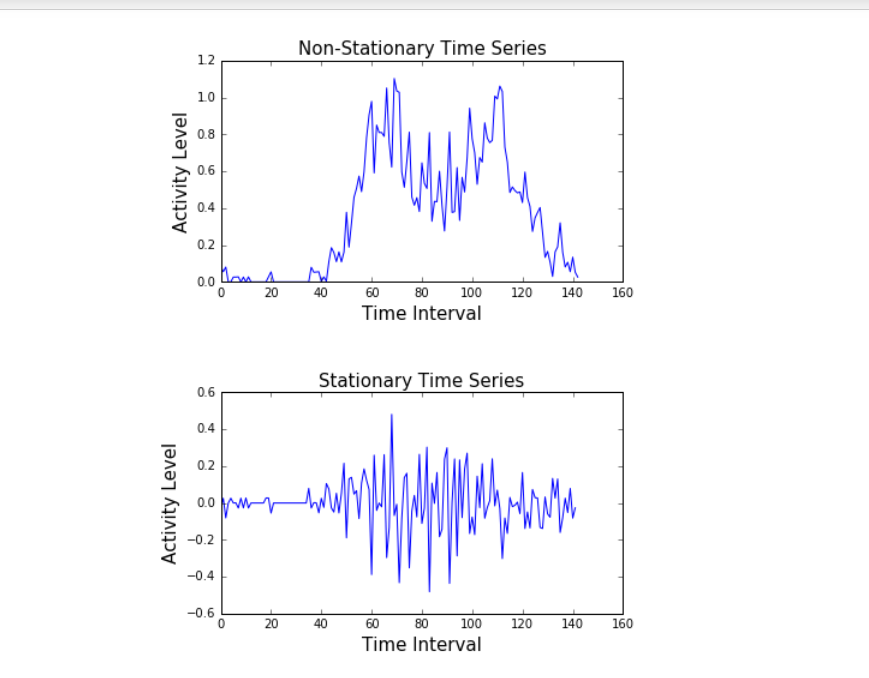

seasonality and trend

![alt text](seasonality.png)

stationarity - data should be centered around 0

![alt text](stationarity.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller # augmented dickey-fuller test to check wether the data is stationary or not.

from statsmodels.tsa.arima.model import ARIMA #for arima model
from statsmodels.tsa.statespace.sarimax import SARIMAX #for sarimax model

from statsmodels.tsa.stattools import acf #for auto correlation plot.
from statsmodels.graphics.tsaplots import plot_acf #to show the ACF plot

from statsmodels.tsa.stattools import pacf #for partial auto correlation plot
from statsmodels.graphics.tsaplots import plot_pacf # to show PACF plot

from sklearn.metrics import mean_squared_error

In [3]:
# dataset
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
# converting 'Month' column in the dataset to Datetime
df.Month = pd.to_datetime(df.Month)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
# replacing index with 'Month' column of the dataset which makes it easier for plotting
df = df.set_index(['Month'])
df.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


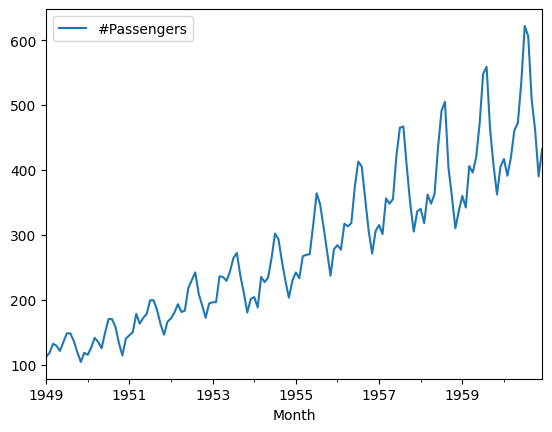

In [8]:
df.plot()
plt.show()

here, you can notice that the variance and mean is fluctuating over the month so we need to convert this non-stationary data into stationary data.

In [9]:
# AUGMENTED DICKEY-FULLER TEST to test if the data is stationary or not.
result = adfuller(df)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

# if p-value <0.05 then we have  to reject the null hypothesis and accept the alternate hypothesis where the data is stationary else if p-value > 0.05 then we have to accept the null hypothesis where the data will be considered as non-stationary.
if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,0.8153688792060482
p-value=0.991880243437641
n_lags,13
The series is not stationary


In [10]:
result #here the first value is ADF static, second value is the p-value and the third value is n-laags

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
# converting non-stationary data to stationary data

rolling stats

Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data. in simple words, for rolling(n), the first 'n-1' values inthe dataset/array will be set to Nan and the average of first 'n' values will be stored at 'n'th index, then average of 2nd to (n+1)th value will be stored at (n+1)th index and so on. 
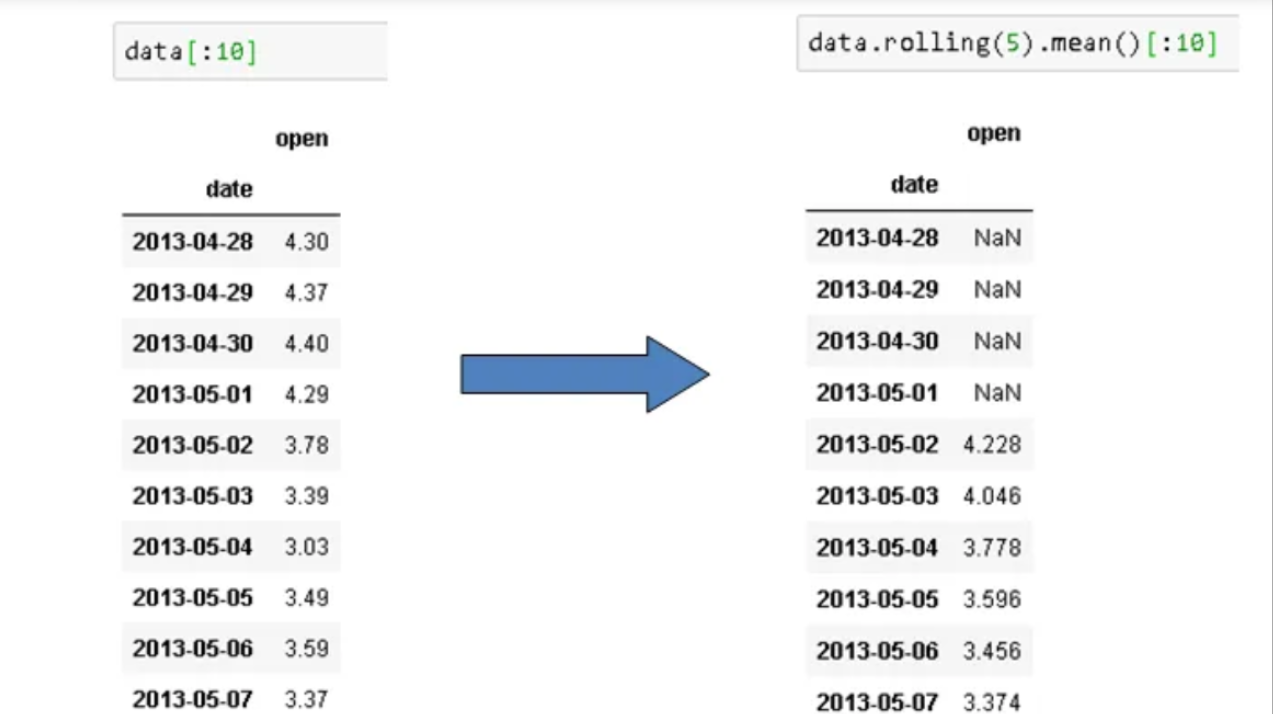
![download.png](attachment:download.png)

Here are some reasons why we perform rolling statistics:

Smoothing: Rolling statistics help in smoothing out the noise or random fluctuations in the data. By calculating the average over a moving window, extreme values or outliers are mitigated, and the underlying trends and patterns become more apparent.

Trend detection: Rolling statistics enable the identification of trends in time series data. By calculating moving averages, it becomes easier to observe whether the data is increasing, decreasing, or staying relatively stable over time. Trends are useful for forecasting and making predictions.

Seasonality analysis: Time series data often exhibit recurring patterns due to seasonality, such as daily, weekly, or yearly patterns. Rolling statistics can help identify these patterns by calculating rolling averages over a relevant period. This information is valuable in understanding and predicting seasonal fluctuations.

In [12]:
# rolling stats
mean_log = df.rolling(window = 12).mean()
std_log = df.rolling(window = 12).std()

# how to select the best 'window' for rolling stats : the window size depends on the interval we want to calculate. for example, for a data containing daily data, we will take larger window value to predict yearly sales, etc.
# higher the window value, more smoothing is applied to the data.

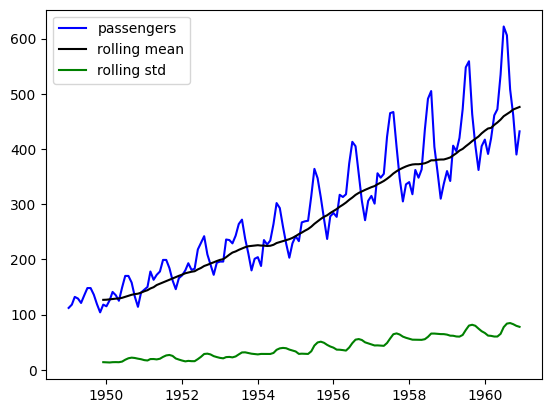

In [13]:
plt.plot(df, label = 'passengers', color = 'blue')
plt.plot(mean_log, label = 'rolling mean', color = 'black')
plt.plot(std_log, label = 'rolling std', color = 'green')
plt.legend()
plt.show()

from the above graph we can notice that the rolling mean & rolling standard deviation itself has trend component, which means that the rolling mean and rolling standard deviation still depends upon time. In order to make data stationary, we need to completely remove the time dependency of the data. so we will now do log normalisation of the data

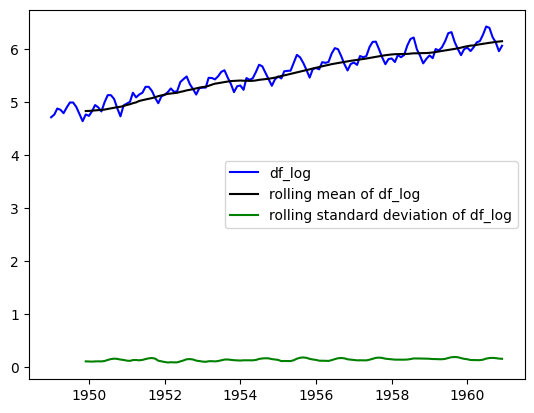

In [14]:
df_log = np.log(df)

# rolling mean of df_log
mean_dflog = df_log.rolling(window = 12).mean()
# rolling standard deviation of df_log
std_dflog = df_log.rolling(window = 12).std()

plt.plot(df_log, label = 'df_log', color = 'blue')
plt.plot(mean_dflog, label = 'rolling mean of df_log', color = 'black')
plt.plot(std_dflog, label = 'rolling standard deviation of df_log', color = 'green')
plt.legend()
plt.show()

In [15]:
# ADF test to check if the data is stationary or not
result = adfuller(df_log)
if(result[1]<0.05):
    print('the data is stationary')
else:
    print('the data is not stationary')

the data is not stationary


since the data is still not stationary, we will now use 'differencing' method to convert the data into stationary 

data is stationary


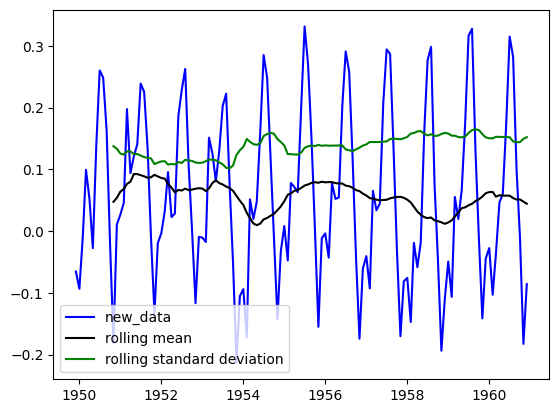

In [16]:
new_data = df_log - mean_dflog
new_data = new_data.dropna()

rolling_new_data = new_data.rolling(window=12)
mean_rolling_new_data = rolling_new_data.mean()
standard_deviation_rolling_new_data = rolling_new_data.std()

# adfuller test to check if the data is stationary or not
result = adfuller(new_data)
if result[1]<0.05:
    print('data is stationary')
else:
    print('data is not stationary')

plt.plot(new_data, label = 'new_data', color = 'blue')
plt.plot(mean_rolling_new_data, label = 'rolling mean', color = 'black')
plt.plot(standard_deviation_rolling_new_data, label = 'rolling standard deviation', color = 'green')
plt.legend()
plt.show()


-so now the data is stationary which means that the data is not longer has trend component and no longer depends on time and the mean and standard deviation is consistant over time.

**time series models:**

    -auto regressive(AR)

    -moving average(MA)

    -auto regresive integrated moving average(ARIMA)

    -seasonal auto regresive integrated moving average(SARIMA)
    
    -seasonal auto regresive integrated moving average with exogenous regressors(SARIMAX)

In [17]:
# ARIMA model: to use ARIMA model, we need 'p', 'd' and 'q' values, where 'p' is 'order of auto regressive, 'd' is the 'degree of differencing' and 'q' is 'order of moving average'
        # - we can find best value of 'q' using ACF(auto correlation graph) graph and  best values of 'p' using PACF(partial auto correlation graph) graph.

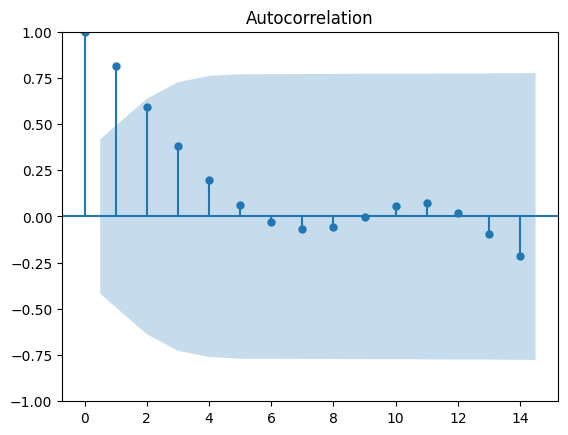

In [18]:
# ACF plot:
acf_plot = acf(df['#Passengers'].dropna())
plot_acf(acf_plot);

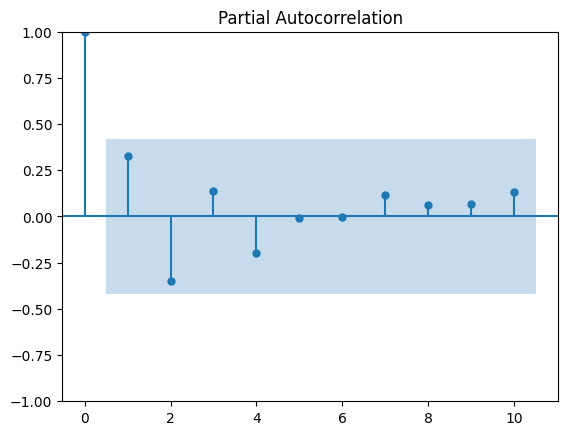

In [19]:
#  PACF plot:
pacf_plot = pacf(df['#Passengers'].dropna())
plot_pacf(pacf_plot, method = 'ywm', lags = 10)

In [20]:
# splitting the dataset into training and testing.(normally we will split the dataset randomly but for time series, we will take first 80% fo the data as training set and rest as testing set.)
train = new_data.iloc[:120]
test = new_data.iloc[120:]

In [21]:
# ARIMA(dataset, order = (p, d, q))
arima = ARIMA(train, order = (7, 0, 7)) 
model = arima.fit()

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(7, 0, 7)   Log Likelihood                 183.847
Date:                Fri, 19 Apr 2024   AIC                           -335.695
Time:                        12:36:55   BIC                           -291.095
Sample:                    12-01-1949   HQIC                          -317.583
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0560      0.008      6.712      0.000       0.040       0.072
ar.L1          0.8054      0.094      8.557      0.000       0.621       0.990
ar.L2         -0.4026      0.161     -2.507      0.012      -0.717      -0.088
ar.L3         -0.1198      0.183     -0.654      0.513      -0.479       0.239
ar.L4         -0.3612      0.163     -2.212      0.027      -0.681      -0.041
ar.L5         -0.1746      0.189     -0.923      0.356      -0.546       0.196
ar.L6          0.6310      0.163      3.867      0.000       0.311       0.951
ar.L7         -0.9268      0.094     -9.874      0.000      -1.111      -0.743
ma.L1         -0.5010      0.307     -1.633      0.102      -1.102       0.100
ma.L2          0.4272      0.344      1.243      0.214      -0.247       1.101
ma.L3          0.3343      0.478      0.700      0.484      -0.602       1.271
ma.L4          0.3634      0.403      0.902      0.367      -0.426       1.153
ma.L5          0.5451      0.564      0.966      0.334      -0.561       1.651
ma.L6         -0.5259      0.491     -1.072      0.284      -1.487       0.436
ma.L7          0.8625      0.441      1.956      0.051      -0.002       1.727
sigma2         0.0022      0.001      2.215      0.027       0.000       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.47   Prob(JB):                         0.66
Heteroskedasticity (H):               0.81   Skew:                             0.15
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Month'>

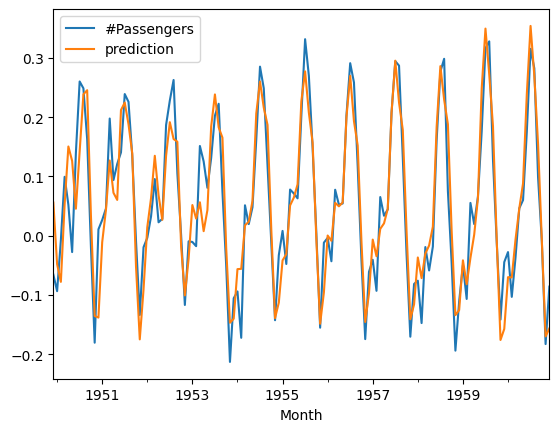

In [23]:
# arima.predict() predicts the values based on the trained model, but this function can only predict till the dates available in the dataset. when we want to predict the values beyond the dates available in the dataset we will use forecast().

# predict(start = start_index/start_Date, end = end_index/end_Date)
# the value of 'end' parameter should always be greater than 'start' value
new_data['prediction'] = model.predict(start=0,end = len(new_data)) 
new_data.tail()

# plotting the values
new_data.plot()

<AxesSubplot: xlabel='Month'>

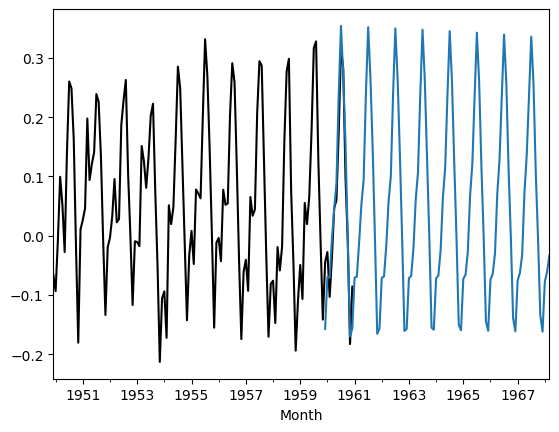

In [24]:
# forecast(steps = number_of_dates) - predicts the values beyond the dates available in the dataset.
forecast = model.forecast(steps = 100)
new_data['#Passengers'].plot(color = 'black')
forecast.plot()

In [25]:
# cost function of ARIMA model using mean_squared_error()
pred = model.predict(start = len(train), end = len(new_data)-1)
print("mean squared error = ", mean_squared_error(test, pred))

mean squared error =  0.0024041776416041253


In [26]:
# SARIMAX model
# SARIMAX(train_set, order(p, d, q), seasonal_order = (p, d, q, seasonal_constant))
"""here, 'seasonal_constant' is the value which says that after how many observations the time/seasonas will be repeated. i.e, if we have monthly data then the seasonal_constant will be 12 as after 12 months the months will repeat again, if we have quaterly data then the seasonal_constant will be 4 as after 4 quaters it will repeat again, if we ahve yealr"""

sarimax = SARIMAX(train, order = (3, 0, 2), seasonal_order=(3, 0, 2, 12))
model = sarimax.fit()


c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


mean squared error = 0.0009337946920279915


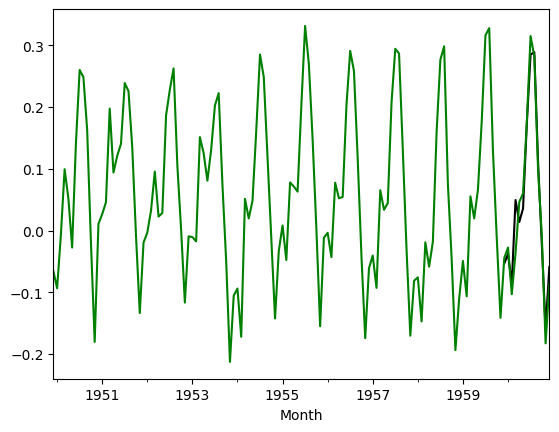

In [27]:
pred = model.predict(start = len(train), end = len(new_data)-1)
pred.plot(color = 'black')
new_data['#Passengers'].plot(color = 'green')

print('mean squared error =', mean_squared_error(pred, test))

<AxesSubplot: xlabel='Month'>

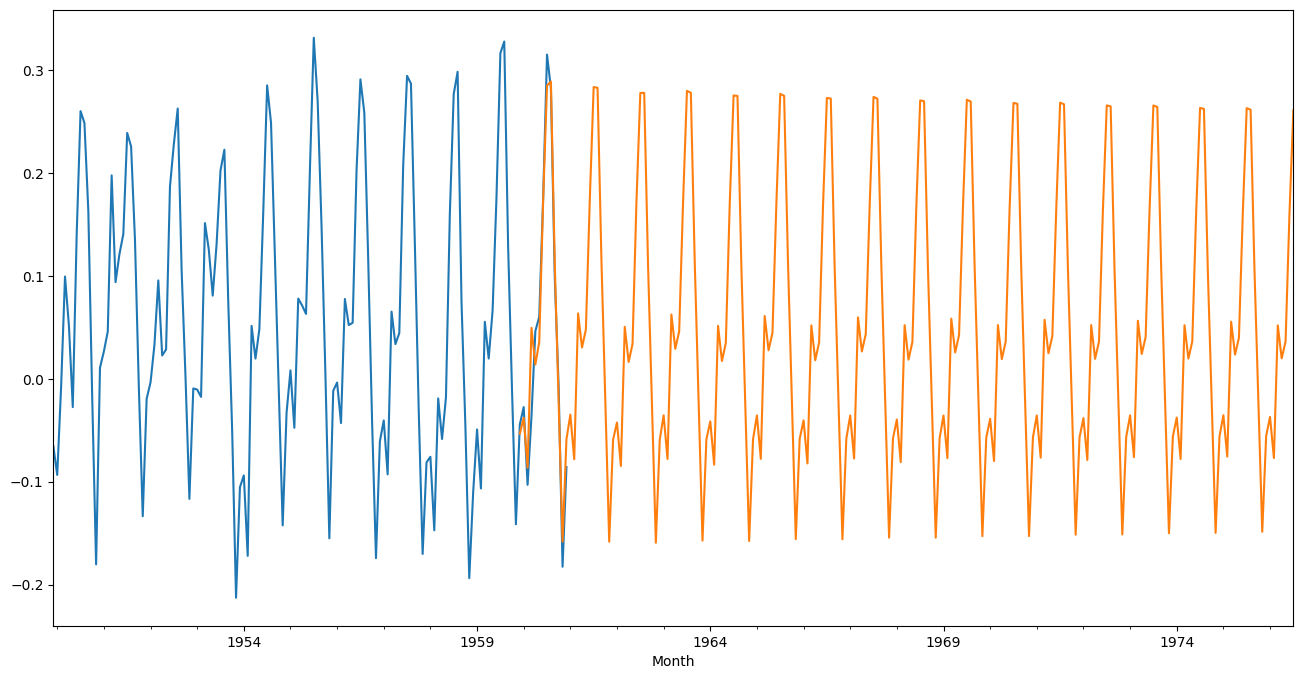

In [28]:
plt.subplots(figsize = (16, 8))
forecast = model.forecast(steps = 200)
new_data['#Passengers'].plot()
forecast.plot()

to select the best values for 'p', 'd', 'q':

        - you can use pmdarima.auto_arima()
        
        - you can calculate 'mean_squared_error' of ARIMA model with different values for 'p', 'd', 'q' and select the one with the lowest error rate.

In [29]:
# auto_arima()
from pmdarima import auto_arima
auto_arima(train ,test = 'adf',  start_p = 0, max_p = 10, start_q = 0, max_q= 10, start_d = 0, max_d = 10, trace = True, seasonal= True, stationary=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-138.652, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-210.206, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-222.096, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-120.730, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-227.607, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-248.894, Time=0.72 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-232.727, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-247.038, Time=0.80 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-227.267, Time=1.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-225.803, Time=2.53 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-233.787, Time=1.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-255.482, Time=1.97 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-254.387, Time=1.07 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-244.696, Time=1.58 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True)

In [30]:
# ANTOHER METHOD TO GET THE BEST VALUES FOR 'P', 'D', AND 'Q' THROUGH 'for' LOOP, BUT THE DISADVANTAGE OF THIS METHOD IS THAT IT TAKES VERY LONG TO EXECUTE. SO DON'T USE THIS METHOD OR YOU CAN USE GOOGLE COLAB FOR THIS METHOD.

# new_train = train.iloc[:20]
# new_test = train.iloc[20:30]

# error = []
# combination = []

# for i in range(0, 11):
#     for j in range(0, 5):
#         for k in range(0, 11):
#             model = ARIMA(new_train, order = (i, j, k)).fit()
#             pred = model.predict(start = len(new_train), end = len(new_train)+len(new_test)-1)
#             error.append(mean_squared_error(new_test, pred))
#             combination.append((i, j, k))

# err = pd.DataFrame(data = error, index=combination)
